## From this notebook, we are going to build classification models.

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
df = pd.read_csv('../data/sales.csv')
df.dropna(subset=['price'], inplace=True)

In [5]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year
train_raw = df[df.year < 2015]
test_raw = df[df.year >= 2015]

In [6]:
train_raw.head(1)

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,year
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm,2008


# 1. Generate Targets

<font color='red'>Assignment:</font> We define a categorical target **luxury**. If **price** is higher than 500k dollars, we say this item is a **luxury**, and use integer 1 to mark it as positive. Otherwise, we use 0 to mark it as negative. Get the target Series for training and testing data sets (**y_train** and **y_test**), respectively.

In [ ]:
# train_raw['price'] = train_raw['price'].map(lambda x: x if type(x) is float else float(x.strip('$').replace(',', '')))

In [ ]:
# test_raw['price'] = test_raw['price'].map(lambda x: x if type(x) is float else float(x.strip('$').replace(',', '')))

In [7]:
# train_raw['luxury'] = ''
# test_raw['luxury'] = ''
# train_raw['luxury'].values[:] = 0
# test_raw['luxury'].values[:] = 0

In [ ]:
# train_raw['luxury'][train_raw[train_raw.price > 500000].index] = 1
# test_raw['luxury'][test_raw[test_raw.price > 500000].index] = 1

In [13]:
train_raw["luxury"] = train_raw["price"].map(lambda x: 1 if float(x.strip("$").replace(",", "")) > 500000 else 0)
test_raw["luxury"] = test_raw["price"].map(lambda x: 1 if float(x.strip("$").replace(",", "")) > 500000 else 0)

In [14]:
y_train = train_raw.luxury

In [15]:
y_test = test_raw.luxury

<font color='red'>Assignment:</font> Visualize the comparison between the numbers of positive and negative data points. **Hint:** You could use either bar chart or pie chart.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Test set')

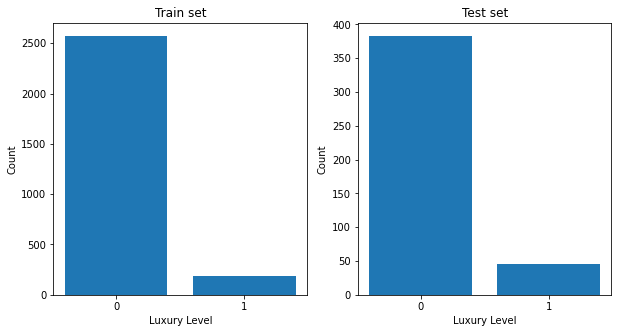

In [11]:
figure, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].bar(y_train.groupby(y_train).groups.keys(), height=y_train.groupby(y_train).count())
axes[0].set_xlabel('Luxury Level')
axes[0].set_xticks(list(y_train.groupby(y_train).groups.keys()))
axes[0].set_ylabel('Count')
axes[0].set_title('Train set')
axes[1].bar(y_test.groupby(y_test).groups.keys(), height=y_test.groupby(y_test).count())
axes[1].set_xlabel('Luxury Level')
axes[1].set_xticks(list(y_test.groupby(y_test).groups.keys()))
axes[1].set_ylabel('Count')
axes[1].set_title('Test set')

<BarContainer object of 2 artists>

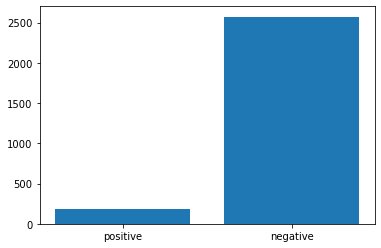

In [17]:
plt.bar(['positive', 'negative'], [train_raw['luxury'].sum(), train_raw.shape[0]-train_raw['luxury'].sum()])

<font color='red'>Question:</font> What is the definition of base rate?

### Base rate, refers to the probabilities unconditioned on featural evidence. In Bayes' theorem, it is also referred to as Prior probability. 

### Always calculate base rate with the training dataset, as you should not have information on the labeling of test dataset.

<font color='red'>Question:</font> What is the base rate in this case?

In [18]:
train_raw['luxury'].sum()/train_raw.shape[0]

0.06673920928545521

In [19]:
# using value_counts
train_raw['luxury'].value_counts(normalize=True)

0    0.933261
1    0.066739
Name: luxury, dtype: float64

# 2. Simplest Models

## 2.1 All Negative Model

### 2.1.1 Model Building

<font color='red'>Assignment:</font> Build a model which always predicts 0.

In [15]:
# from sklearn.base import BaseEstimator, ClassifierMixin

# class benchmark_model(BaseEstimator, ClassifierMixin):
#     '''
#     a model which always predicts 0
#     '''
#     def __init__(self):
#         self.prediction = 0
    
#     def fit(self, X, y=None):
#         return self
    
#     def predict(self, X, y=None):
#         return [self.prediction]*len(X)
        
# # Ref: https://danielhnyk.cz/creating-your-own-estimator-scikit-learn/

In [20]:
from sklearn.dummy import DummyClassifier
dummyc = DummyClassifier(strategy = 'constant', constant = 0)
dummyc.fit(train_raw.price, y_train)

DummyClassifier(constant=0, strategy='constant')

<font color='red'>Assignment:</font> Make predictions for both training and testing data.

In [21]:
y_train_pred = dummyc.predict(train_raw.price)
y_test_pred = dummyc.predict(test_raw.price)

In [22]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 2.1.2 Accuracy

<font color='red'>Assignment:</font> Calculate the training and testing **accuracy_score**s.

In [24]:
from sklearn.metrics import accuracy_score

print("Accuracy score for the training set: {0:.3f}".
      format(accuracy_score(y_train,y_train_pred)))
print("Accuracy score for the testing set: {0:.3f}".
      format(accuracy_score(y_test,y_test_pred)))

Accuracy score for the training set: 0.933
Accuracy score for the testing set: 0.893


<font color='red'>Question:</font> How is accuracy score calculated?

**Answer:** It is the number of correct predictions made divided by the total number of predictions made.

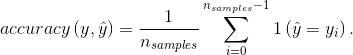

<font color='red'>Question:</font> Are the accuracy scores good? Why is that? Is the model useful?

### Although the score seems high, it is not useful. If we think about how many true 0s we have, we will realize that setting everything to zero will give you a quite 'nice' prediction...

<font color='red'>Question:</font> How is accuracy score related to base rate?

### For the case above, accuracy = 1 - base rate. (They are often not related)

### 2.1.2 Precision

<font color='red'>Assignment:</font> Calculate the training and testing **precision_score**s.

In [25]:
from sklearn.metrics import precision_score

precision_score(y_train, y_train_pred, average='weighted')

0.8709757034851374

In [26]:
precision_score(y_train, y_train_pred, average='macro')

0.4666303953572724

In [27]:
precision_score(y_train, y_train_pred, average='binary')

0.0

<font color='red'>Question:</font> How is **precision_score** calculated?

### The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

<font color='red'>Question:</font> If the **precision_score** for a model is 80%, what does it mean?

### 80% of positive predictions are correct.

### 2.1.3 Recall

<font color='red'>Assignment:</font> Calculate the training and testing **recall_score**s.

In [28]:
from sklearn.metrics import recall_score

recall_score(y_train, y_train_pred, average='weighted')

0.9332607907145448

In [29]:
recall_score(y_train, y_train_pred, average='macro')

0.5

In [30]:
recall_score(y_train, y_train_pred, average='binary')

0.0

<font color='red'>Question:</font> How is **recall_score** calculated?

### The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

<font color='red'>Question:</font> If the **recall_score** for a model is 80%, what does it mean?

### 80% of positive cases have been correctly identified.

### 2.1.4 F1 Score

<font color='red'>Assignment:</font> Calculate the training and testing **f1_score**s.

In [31]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred, average='weighted')

0.9010431574140803

In [32]:
f1_score(y_train, y_train_pred, average='macro')

0.48273921200750475

In [33]:
f1_score(y_train, y_train_pred, average='binary')

0.0

<font color='red'>Question:</font> How is **f1_score** calculated?

### The F1 score can be interpreted as a weighted average of the precision and recall. F1 = 2 * (precision * recall) / (precision + recall)

<font color='red'>Question:</font> Why do we need **f1_score**?

### The F1 score conveys the balance between the precision and the recall. It is a better metric when there are imbalanced classes. In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on.

### 2.1.5 Classification Report

<font color='red'>Assignment:</font> Use **classification_report** to get systematic idea about model performance.

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# in binary classification, recall of the positive class is also known as “sensitivity”;
# recall of the negative class is “specificity”.

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      2573
           1       0.00      0.00      0.00       184

    accuracy                           0.93      2757
   macro avg       0.47      0.50      0.48      2757
weighted avg       0.87      0.93      0.90      2757

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       383
           1       0.00      0.00      0.00        46

    accuracy                           0.89       429
   macro avg       0.45      0.50      0.47       429
weighted avg       0.80      0.89      0.84       429



In [38]:
print(classification_report(y_train, y_train_pred, labels=[1,0])) # you can specify labels

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       184
           0       0.93      1.00      0.97      2573

    accuracy                           0.93      2757
   macro avg       0.47      0.50      0.48      2757
weighted avg       0.87      0.93      0.90      2757



### 2.1.6 Confusion Matrix

<font color='red'>Assignment:</font> Get the **confusion_matrix** of the model.

In [39]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_pred, normalize=None))

[[2573    0]
 [ 184    0]]


In [42]:
confusion_matrix(y_test, y_test_pred, normalize='all')

array([[0.89277389, 0.        ],
       [0.10722611, 0.        ]])

In [36]:
cmtx = pd.DataFrame(
    confusion_matrix(y_train, y_train_pred, labels=[0, 1]), 
    index=['true:0', 'true:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)

        pred:0  pred:1
true:0    2573       0
true:1     184       0


<font color='red'>Question:</font> What does every element in the confusion matrix represent, respectively?

### Top left element is true negative, top right is false positive, left bottom is false negative and right bottom is true positive.

<font color='red'>Question:</font> How can you calculate recall and precision with a confusion matrix?

### You can find the tp, fp and fn from the confusion matrix.

Recall: tp / (tp + fn)
Precision: tp / (tp + fp)

## 2.2 All Positive Model

### 2.2.1 Model Building

<font color='red'>Assignment:</font> Build a model which always predicts 1.

In [41]:
# class benchmark_model1(BaseEstimator, ClassifierMixin):
#     '''
#     a model which always predicts 1
#     '''
#     def __init__(self):
#         self.prediction = 1
    
#     def fit(self, X, y=None):
#         return self
    
#     def predict(self, X, y=None):
#         return [self.prediction]*len(X)


In [43]:
dummyc = DummyClassifier(strategy = 'constant', constant = 1)
dummyc.fit(train_raw.price, y_train)
y_train_pred_array = dummyc.predict(train_raw.price)
y_test_pred_array = dummyc.predict(test_raw.price)

<font color='red'>Assignment:</font> Make predictions for both training and testing data.

In [44]:
y_train_pred = dummyc.predict(train_raw.price)
y_test_pred = dummyc.predict(test_raw.price)

### 2.2.2 Scores and confusion matrices

<font color='red'>Assignment:</font> Calculate the scores and confusion matrices of this model.

In [45]:
print("Accuracy score for the training set: {0:.3f}".
      format(accuracy_score(y_train,y_train_pred)))
print("Accuracy score for the testing set: {0:.3f}".
      format(accuracy_score(y_test,y_test_pred)))

print("Precision score for the training set: {0:.3f}".
      format(precision_score(y_train,y_train_pred, average='macro')))
print("Precision score for the testing set: {0:.3f}".
      format(precision_score(y_test,y_test_pred, average='macro')))

print("Recall score for the training set: {0:.3f}".
      format(recall_score(y_train,y_train_pred, average='macro')))
print("Recall score for the testing set: {0:.3f}".
      format(recall_score(y_test,y_test_pred, average='macro')))

print("F1 score for the training set: {0:.3f}".
      format(f1_score(y_train,y_train_pred, average='macro')))
print("F1 score for the testing set: {0:.3f}".
      format(f1_score(y_test,y_test_pred, average='macro')))

Accuracy score for the training set: 0.067
Accuracy score for the testing set: 0.107
Precision score for the training set: 0.033
Precision score for the testing set: 0.054
Recall score for the training set: 0.500
Recall score for the testing set: 0.500
F1 score for the training set: 0.063
F1 score for the testing set: 0.097


In [25]:
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2573
           1       0.07      1.00      0.13       184

    accuracy                           0.07      2757
   macro avg       0.03      0.50      0.06      2757
weighted avg       0.00      0.07      0.01      2757

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       383
           1       0.11      1.00      0.19        46

    accuracy                           0.11       429
   macro avg       0.05      0.50      0.10       429
weighted avg       0.01      0.11      0.02       429

[[   0 2573]
 [   0  184]]
[[  0 383]
 [  0  46]]


<font color='red'>Question:</font> What are the difference between all-positive and all-negative models?

If we just focus on the positive label:
- Accuracy score of the all-positive model is the same as the base rate and equal to 1 - accuracy score of the all-negative model.
- Precision of the all-negative model is 0 because there are no positive predictions; precision of the all-positive model is low because there are many false positives.
- Recall of the all-negative model is 0 because there are no positive predictions; recall of the all-positive model is 1 because there are no  negative predictions (thus no false negative).
- F1 score of the all-negative model is 0 because recall and precision are 0; F1 score of the all-positive model is low despite recall being 1 because precision is low.

## Notes

1. Classification metrics
- Precision: TP/(TP+FP); Among predicted positives, how many are true?
- Recall: TP/(TP+FN); Among all positives, how many are predicted?
- Accuracy: (TP+TN)/(TP+FP+TN+FN); Measure of all the correctly classified observations. Good for balanced classes.
- F-1 Score: 2/(1/Precision + 1/Recall); Harmonic mean of precision and recall. Good for imbalanced classes.
- ROC_AUC: measure model’s capability to distinguish positive and negative class and is insensitive to class balance. 
- Sensitivity: the ability of a test to correctly identify patients with a disease. TP/(TP+FN) = Recall = True Positive Rate
- Specificity: the ability of a test to correctly identify people without the disease. TN/(TN+FP) = 1 - False Positive Rate

2. Understand when to use what metrics (find some examples yourself):
- Precision is particularly useful when the costs of False Positives is high.
- Recall is particularly useful when the cost of False Negatives is high.

3. Average methods for recall and precision
- Binary: default value, only report results for the class specified by pos_label. Binary is applicable only if targets are binary.
- Micro: now replaced by accuracy.
- Macro: unweighted mean for all classes. e.g., macro recall = 0.5*(recall_pos + recall_neg)
- Weighted: weighted mean for all classes. e.g., weighted recall = recall_ pos * weight_pos + recall_ neg * weight_neg, where weight_pos = count_pos/count_all, weight_neg = count_neg/count_all

4. How to assess if a dataset is imbalanced? Look at the base rates (event rates). No hard cutoff.